# Create mask images from COCO dataset

In [ ]:
# pip install git+https://github.com/philferriere/cocoapi.git#egg=pycocotools^&subdirectory=PythonAPI

In [1]:
# Change the "%matplotlib inline" figure resolution on the notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
import zipfile
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# %matplotlib inline

In [ ]:
# archive = zipfile.ZipFile('.\CVATLabeling\PGRRoseau_JON\jonpgr_roseau2021__0004.zip', 'r')
# annFile = archive.read('annotations/instances_default.json')
coco=COCO(annFile)
# "\CVATLabeling\PGRRoseau_JON\jonpgr_roseau2021__0004.zip\annotations/instances_default.json"

In [39]:
dataDir='./CVATLabeling/'
# "J:\My Drive\M.Sc\THESIS\ImageAnalysis\SpikeProperties\SpykProps\CVATLabeling\annotations\instances_default.json"
dataType='default'
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType)
# annFile="\CVATLabeling\PGRRoseau_JON\jonpgr_roseau2021__0004.zip\annotations\instances_default.json"
# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

print(cats)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
[{'id': 1, 'name': 'Full Spikelet', 'supercategory': ''}, {'id': 2, 'name': 'Rachis', 'supercategory': ''}, {'id': 3, 'name': 'Shed Spikelet', 'supercategory': ''}, {'id': 4, 'name': 'Floret', 'supercategory': ''}, {'id': 5, 'name': 'Stem Tip', 'supercategory': ''}, {'id': 6, 'name': 'Abnormal Spikelet', 'supercategory': ''}]


In [7]:
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"
print('The class name is', getClassName(3, cats))

The class name is Shed Spikelet


Number of images containing all the  classes: 2


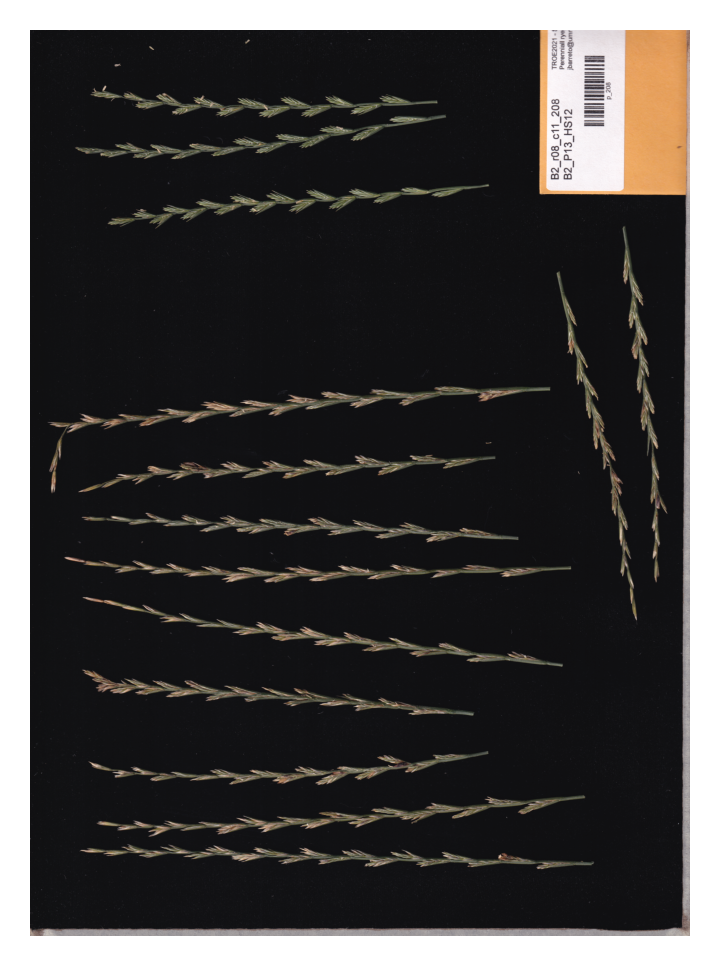

In [8]:
# Define the classes (out of the 81) which you want to see. Others will not be shown.
filterClasses = ['Full Spikelet', 'Shed Spikelet', 'Abnormal Spikelet']
# filterClasses = ['Shed Spikelet']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# catIds = coco.getCatIds(catNms=filterClasses[0]) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('{}/images/{}/{}'.format(dataDir,dataType,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show()

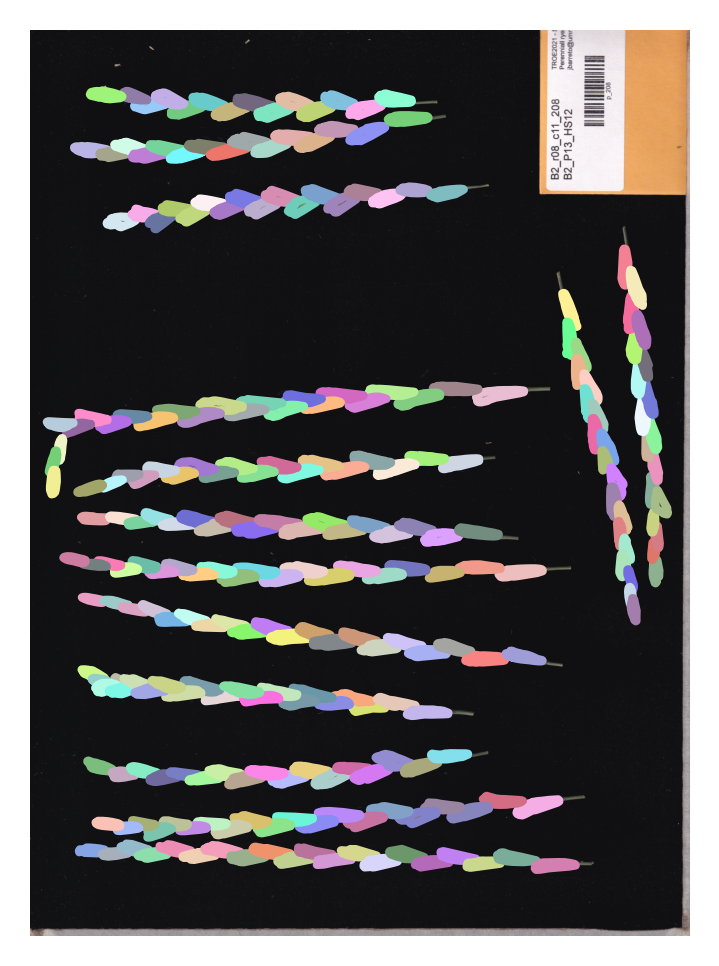

In [10]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

(7016, 5104)

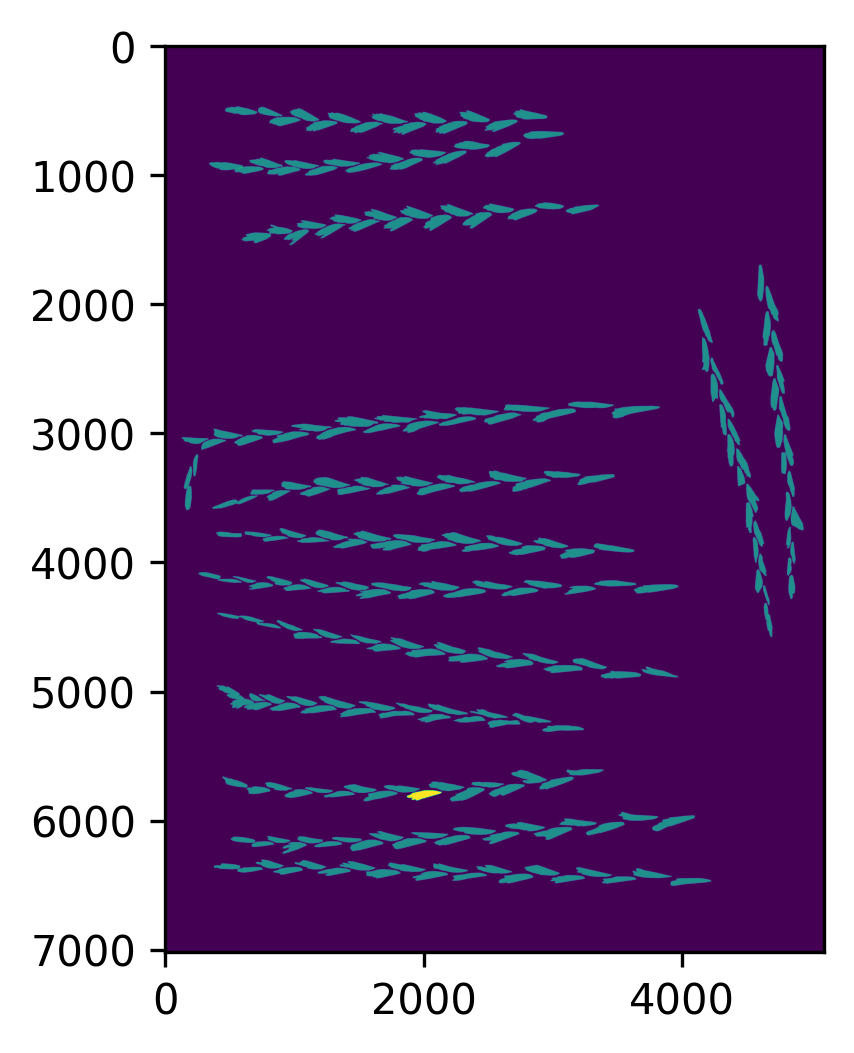

In [11]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)
mask.shape


In [ ]:

########## ALl POSSIBLE COMBINATIONS ########
classes = ['laptop', 'tv', 'cell phone']

images = []
if classes!=None:
    # iterate for each individual class in the list
    for className in classes:
        # get all images containing given class
        catIds = coco.getCatIds(catNms=className)
        imgIds = coco.getImgIds(catIds=catIds)
        images += coco.loadImgs(imgIds)
else:
    imgIds = coco.getImgIds()
    images = coco.loadImgs(imgIds)
    
# Now, filter out the repeated images    
unique_images = []
for i in range(len(images)):
    if images[i] not in unique_images:
        unique_images.append(images[i])

dataset_size = len(unique_images)

print("Number of images containing the filter classes:", dataset_size)

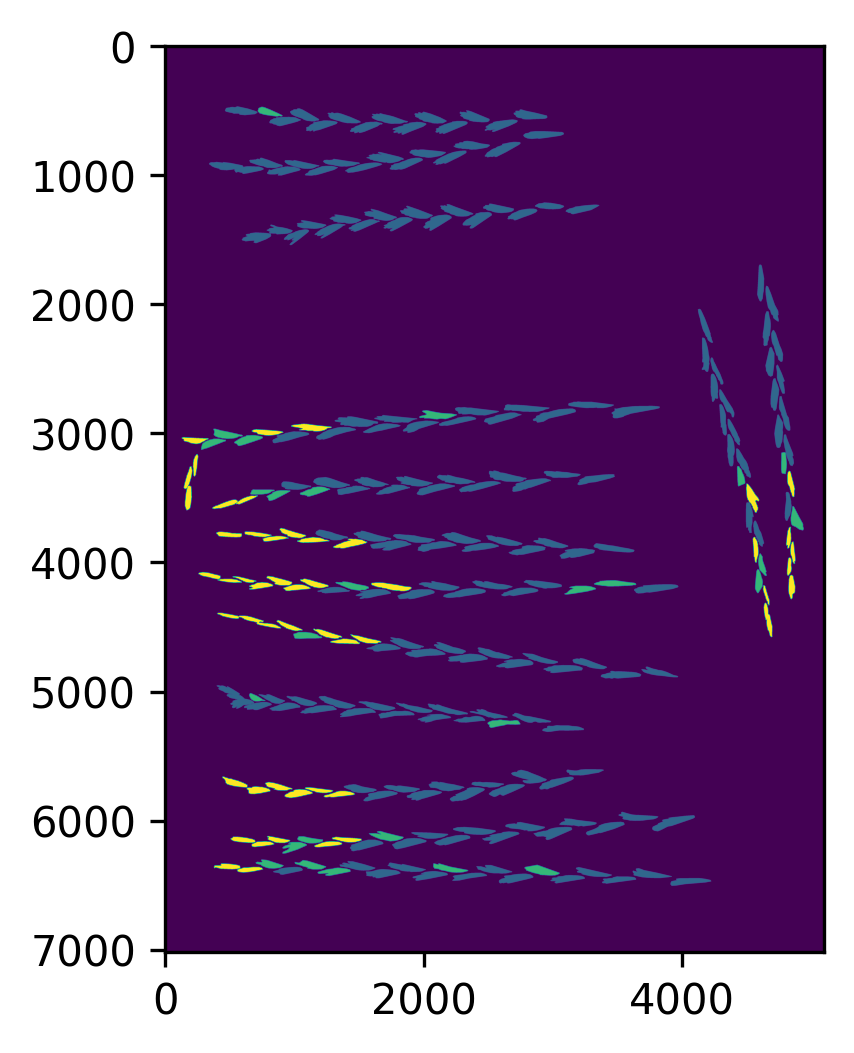

In [14]:
#### GENERATE A SEGMENTATION MASK ####
# filterClasses = ['laptop', 'tv', 'cell phone']
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    className = getClassName(anns[i]['category_id'], cats)
    pixel_value = filterClasses.index(className)+1
    mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
plt.imshow(mask)

In [ ]:
#### GENERATE A BINARY MASK ####
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    mask = np.maximum(coco.annToMask(anns[i]), mask)
plt.imshow(mask)